#Exploring the Data

##Import Data (After replacing missing values)

In [ ]:
import pandas as pd

In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Dataset
df_fna = pd.read_csv('/content/drive/MyDrive/613 Capstone/Data_MissingValuesHandled.csv')
df_fna
#df_train = pd.read_csv("train_LZdllcl.csv")
#df_train

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


##Check that there are no Null Values

In [ ]:
df_fna.columns[df_fna.isna().any()]

Index([], dtype='object')

##Explore Gender Effect on Promotion

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

<Axes: title={'center': '# of Data Points by Gender'}, xlabel='gender', ylabel='# of Employees'>

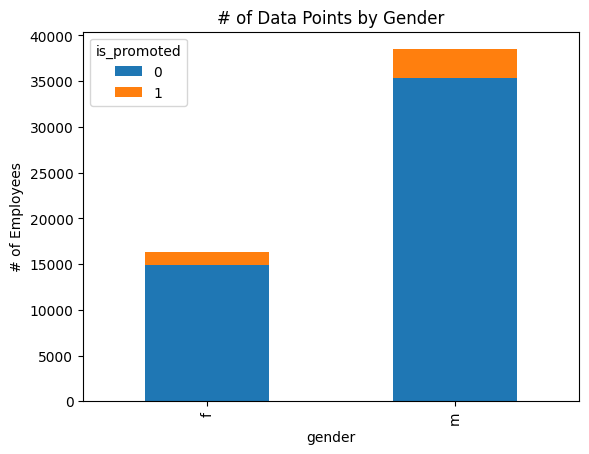

In [ ]:
df_fna.groupby(['gender', 'is_promoted']).size().unstack().plot(kind='bar', stacked=True, title='# of Data Points by Gender', ylabel='# of Employees')

Get percentages of employees that are female and male in our dataset

In [ ]:
genders=df_fna.gender.value_counts()
genders

m    38496
f    16312
Name: gender, dtype: int64

In [ ]:
#% of female vs male employee data
females = (genders[1]/(genders[1]+genders[0]))*100
males = (genders[0]/(genders[1]+genders[0]))*100

print(f"{females}% of the employees are female.")
print(f"{males}% of the employees are male")

29.762078528681947% of the employees are female.
70.23792147131806% of the employees are male


Get percentage of female employees promoted, and percentage of male employees promoted.

In [ ]:
df_female = df_fna[df_fna['gender']=='f']
fem_prom = df_female.is_promoted.value_counts()
fem_prom

0    14845
1     1467
Name: is_promoted, dtype: int64

In [ ]:
#% of females promoted and not promoted
prom_fem = (fem_prom[1]/(fem_prom[0]+fem_prom[1]))*100
nprom_fem = (fem_prom[0]/(fem_prom[0]+fem_prom[1]))*100

print(f"{prom_fem}% of the female employees are promoted.")
print(f"{nprom_fem}% of the female employees are not promoted")

8.993379107405591% of the female employees are promoted.
91.00662089259441% of the female employees are not promoted


In [ ]:
df_male = df_fna[df_fna['gender']=='m']
m_prom = df_male.is_promoted.value_counts()
m_prom

0    35295
1     3201
Name: is_promoted, dtype: int64

In [ ]:
#% of males promoted and not promoted
prom_m = (m_prom[1]/(m_prom[0]+m_prom[1]))*100
nprom_m = (m_prom[0]/(m_prom[0]+m_prom[1]))*100

print(f"{prom_m}% of the male employees are promoted.")
print(f"{nprom_m}% of the male employees are not promoted")

8.315149625935161% of the male employees are promoted.
91.68485037406484% of the male employees are not promoted


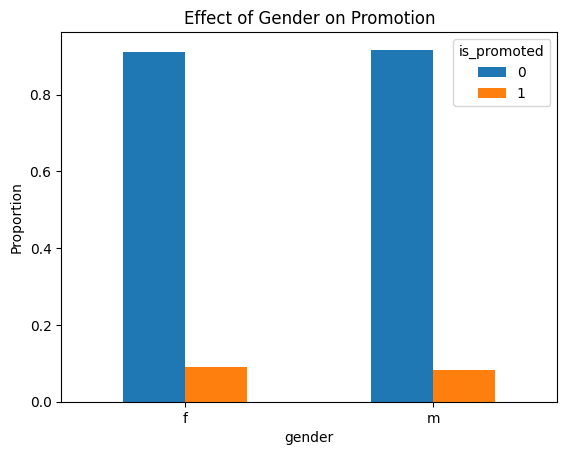

In [ ]:
x = pd.crosstab(df_fna['gender'], df_fna['is_promoted'])
x.div(x.sum(axis=1), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion')
plt.xticks(rotation=0)
plt.ylabel('Proportion')
plt.show()

In [ ]:
#% of promoted employees that are male vs female
print(f"{100*(fem_prom[1]/(m_prom[1]+fem_prom[1]))}% of promoted employees were female.")
print(f"{100*(m_prom[1]/(m_prom[1]+fem_prom[1]))}% of promoted employees were male.")

31.426735218509% of promoted employees were female.
68.573264781491% of promoted employees were male.


Even though a higher percentage of the promotions are to male employees, the percentage of all female employees that are promoted is very similar to the percentage of all male employees that are promoted, meaning that gender does not appear to have much impact on promotion.

##Create a function to Explore Distribution of a given Feature and that Feature's effect on promotion

In [ ]:
def explore_effect_on_promotion(feature, lab_rot):
  import matplotlib.pyplot as plt
  import numpy as np
  plt.rcParams['figure.figsize'] = (8,5)
  #Plot Distribution
  df_fna.groupby([feature,'is_promoted']).size().unstack().plot(kind='bar', stacked=True, title=f'Distribution of Employees by {feature}', ylabel='# of Employees')
  #Plot Proportional Effect on Promotion
  # create dataframe with proportions
  x = pd.crosstab(df_fna[feature], df_fna['is_promoted'])
  pro = x.div(x.sum(axis=1), axis=0)

  # plot
  ax = pro.plot(kind='bar', stacked=False)

  # move legend
  ax.legend(title='is_promoted', bbox_to_anchor=(1, 1.01), loc='upper left')

  # column names from per used to get the column values from df
  cols = pro.columns

  # iterate through each group of containers and the corresponding column name
  for c, col in zip(ax.containers, cols):

      # get the values for the column from df
      vals = x[col]

      # create a custom label for bar_label
      labels = [f'{h*100:.1f}%' if (h := v.get_height()) > 0 else '' for v, val in zip(c, vals)]

      # annotate each section with the custom labels
      ax.bar_label(c, labels=labels, label_type='edge',rotation=0, fontweight='bold')
  plt.title(f'Effect of {feature} on Promotion')
  plt.xticks(rotation=lab_rot)
  plt.ylabel('Proportion')
  plt.show()

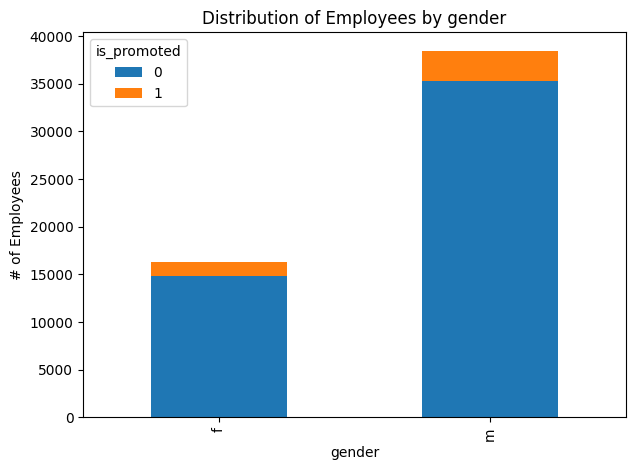

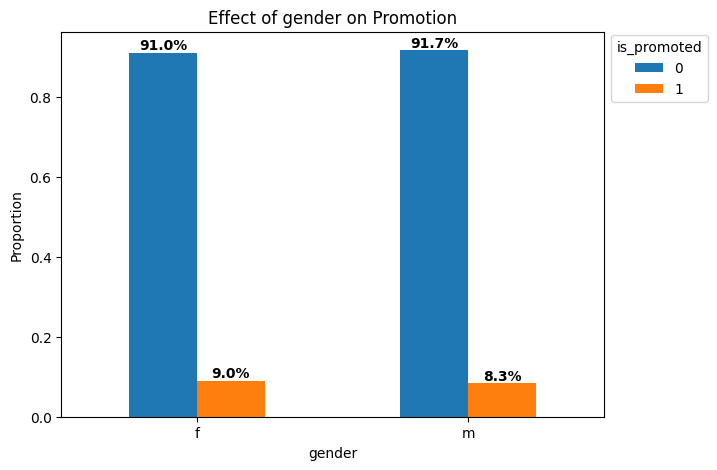

In [ ]:
explore_effect_on_promotion('gender',0)

##Explore Department Effect on Promotion

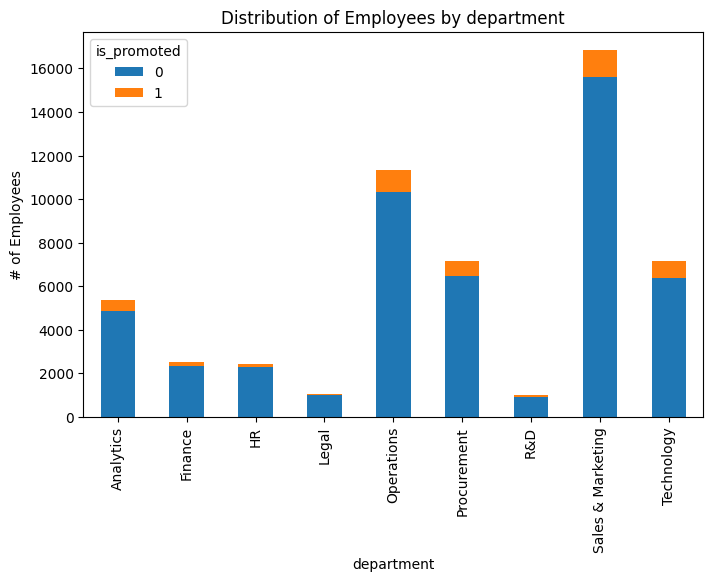

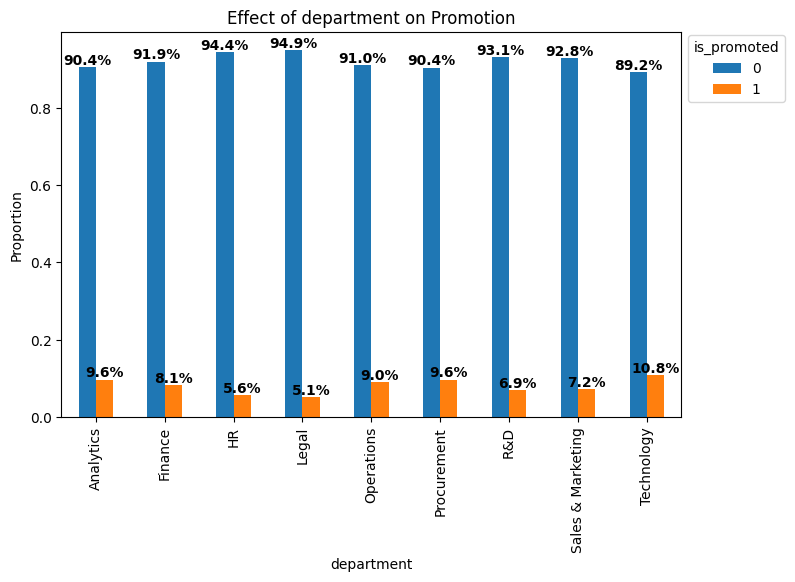

In [ ]:
explore_effect_on_promotion('department',90)

##Explore Region Effect on Promotion

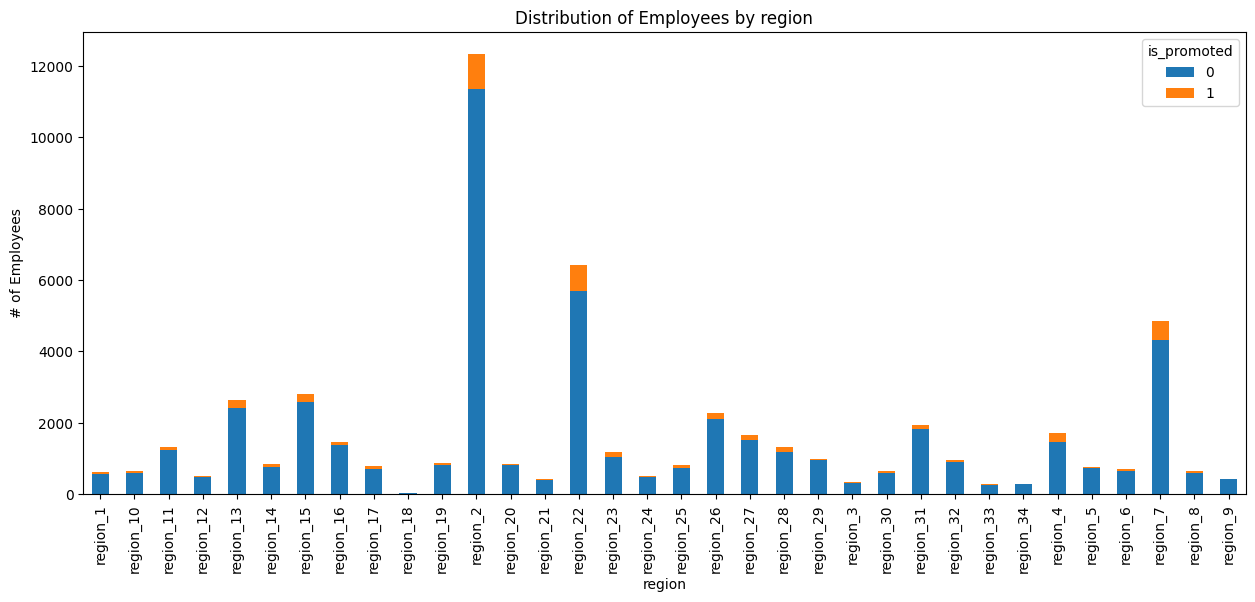

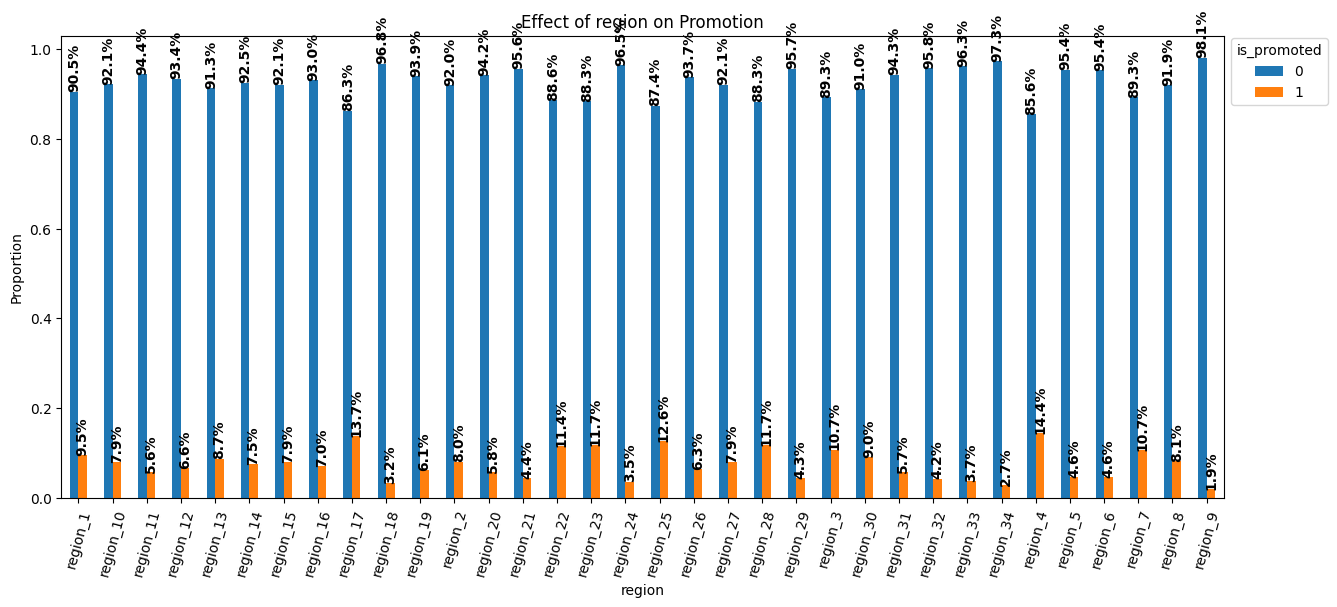

In [ ]:
explore_effect_on_promotion('region',90)

##Explore Education Effect on Promotion

In [ ]:
df_fna['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

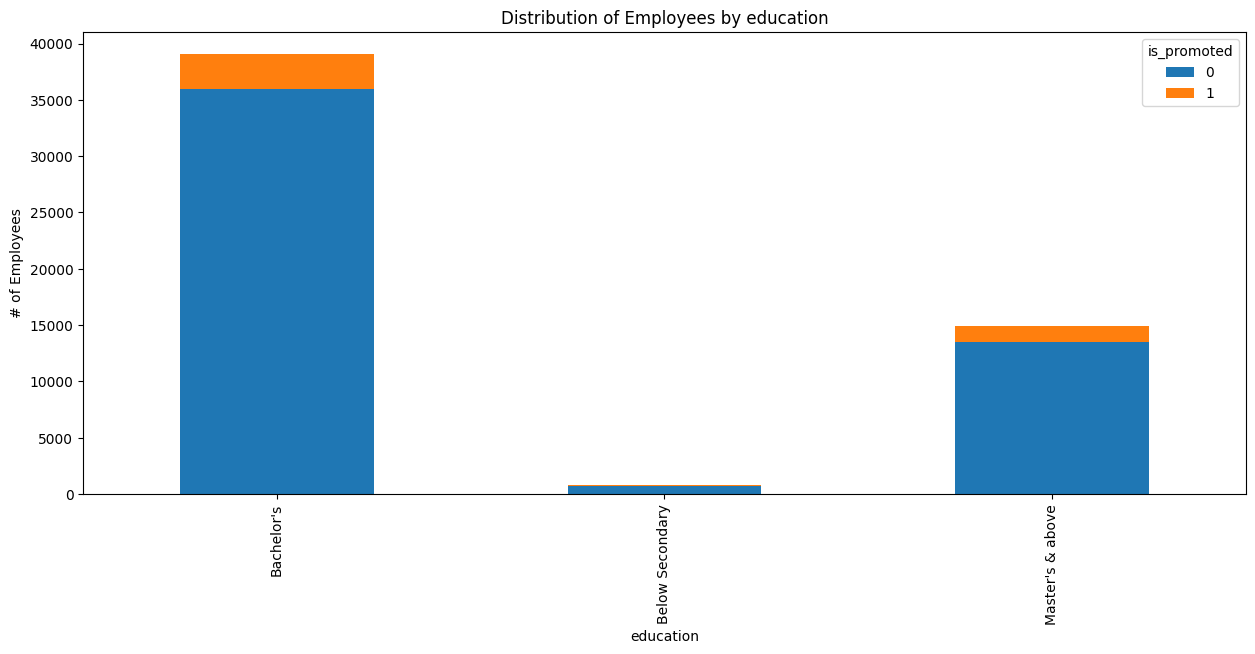

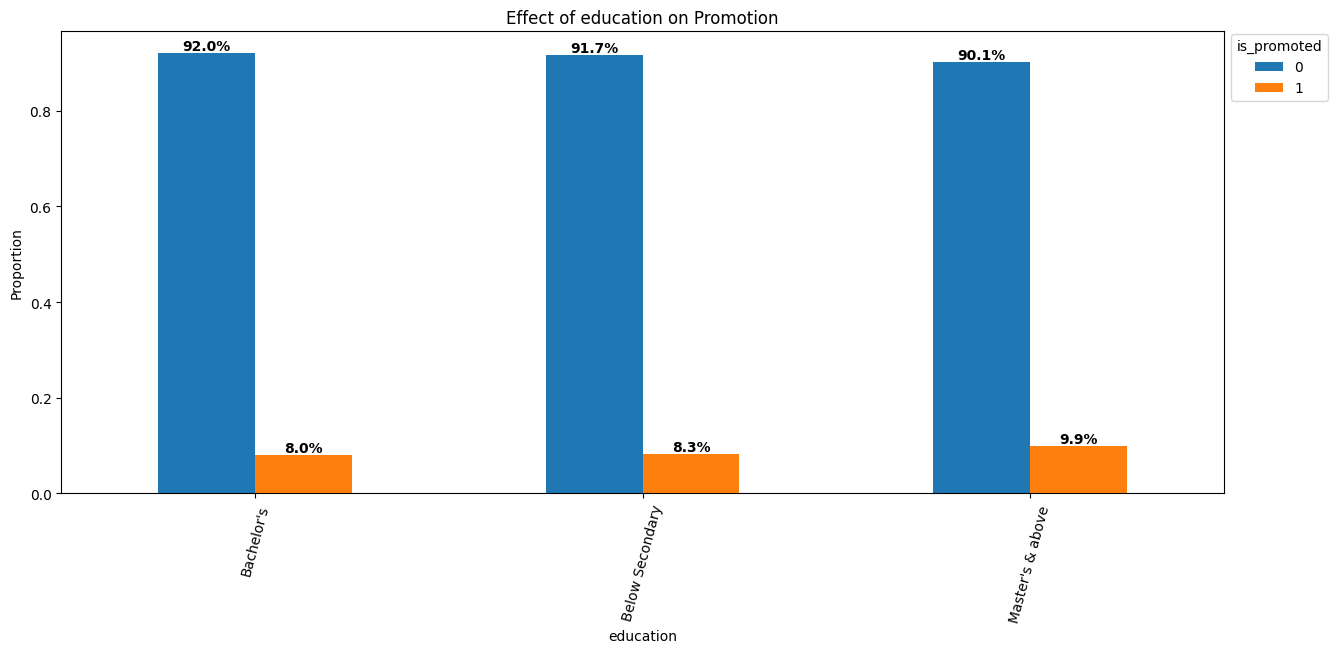

In [ ]:
explore_effect_on_promotion('education',0)

##Explore Recruitment Channel Effect on Promotion

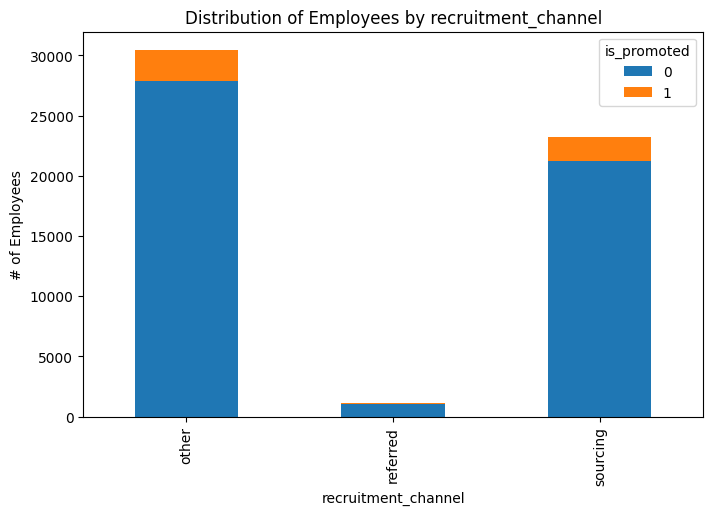

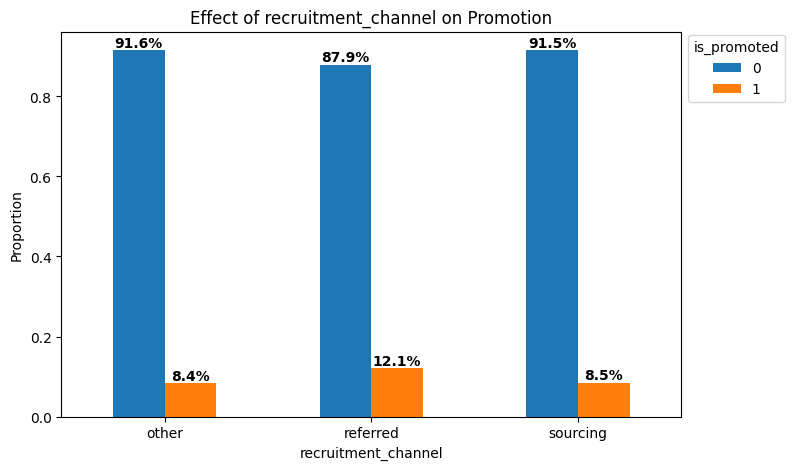

In [ ]:
explore_effect_on_promotion('recruitment_channel',0)

##Explore Number of Trainings Effect on Promotion

In [ ]:
df_fna['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

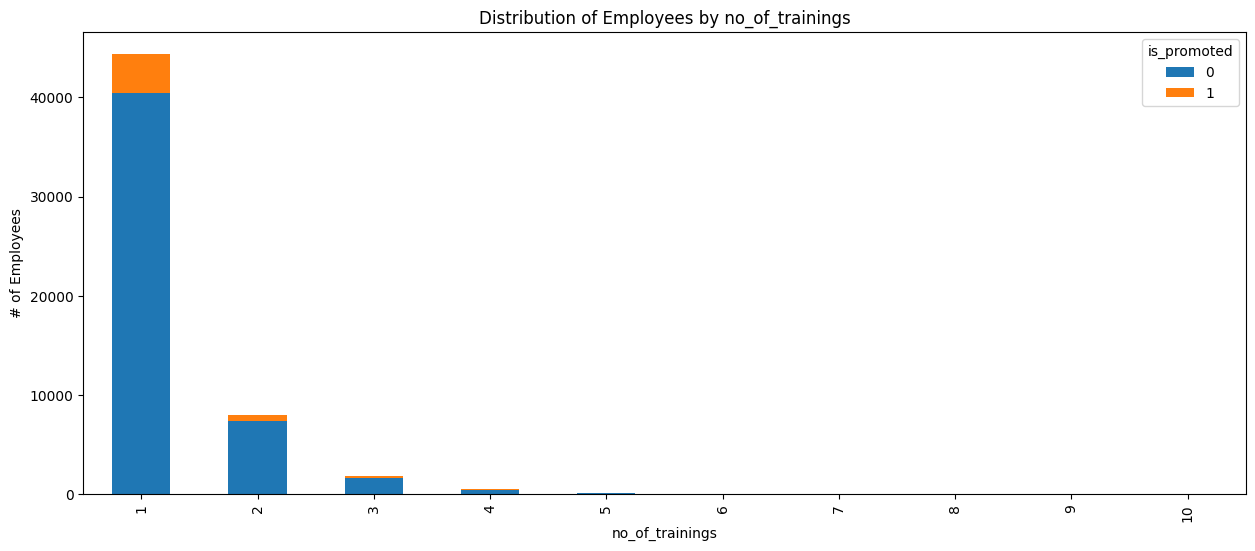

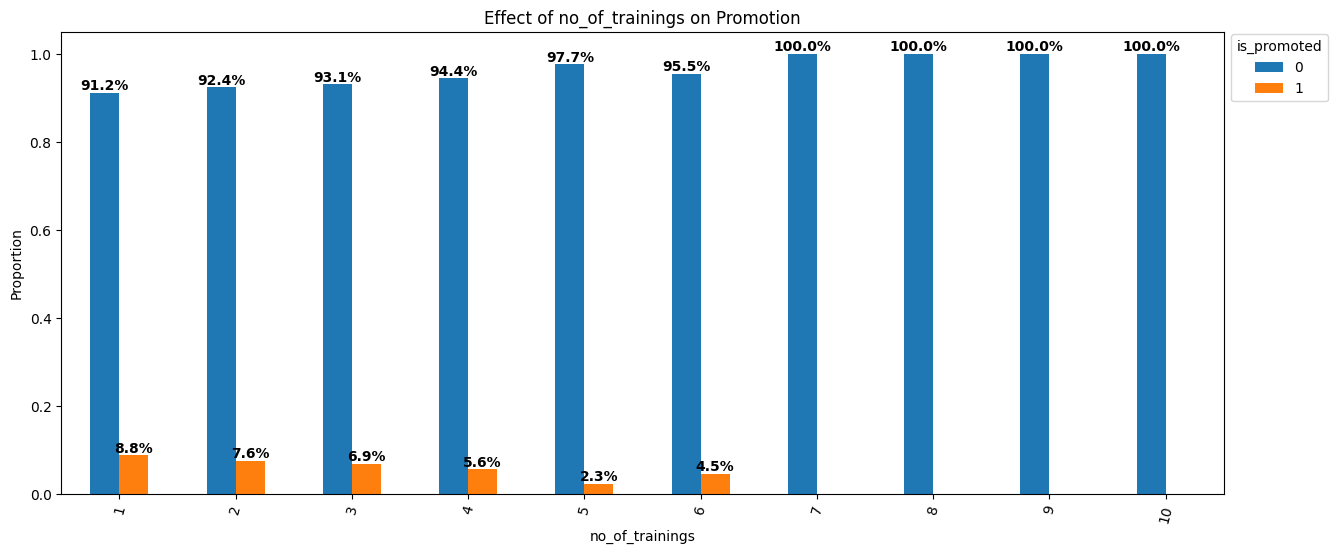

In [ ]:
explore_effect_on_promotion('no_of_trainings',0)

Minimal employees exist with higher than 5 trainings and of those above 6 that do we have none that were promoted. Will try to set those with no_of_trainings of 6-10 to 5 instead, this will then represent those with >=5 trainings.

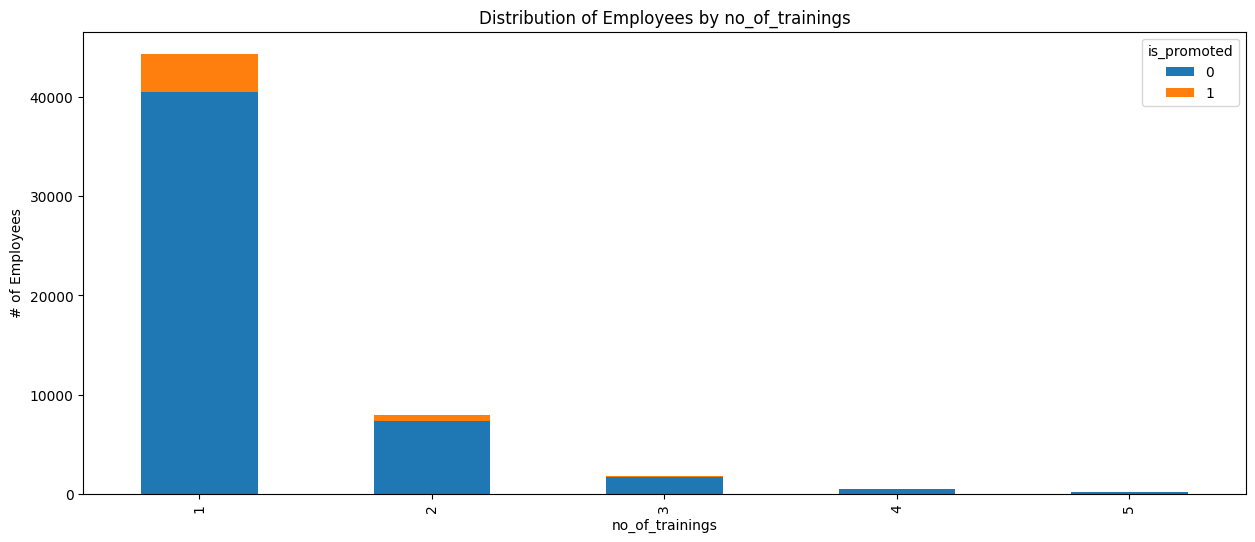

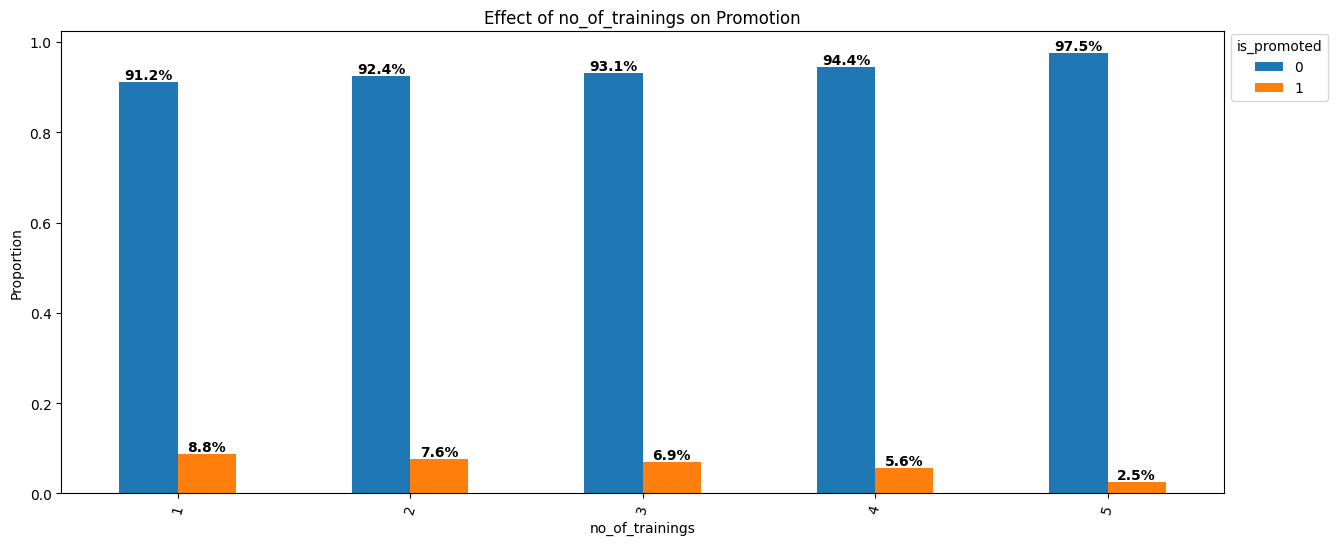

In [ ]:
df_fna.loc[df_fna['no_of_trainings'] > 5, 'no_of_trainings']=5
explore_effect_on_promotion('no_of_trainings',0)

##Explore Age Effect on Promotion

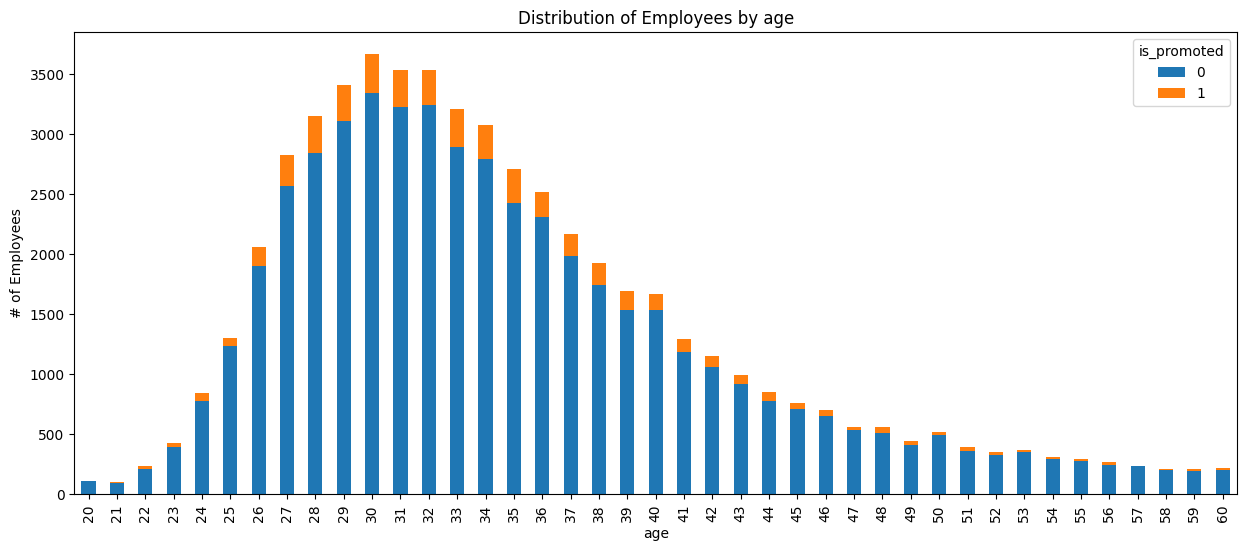

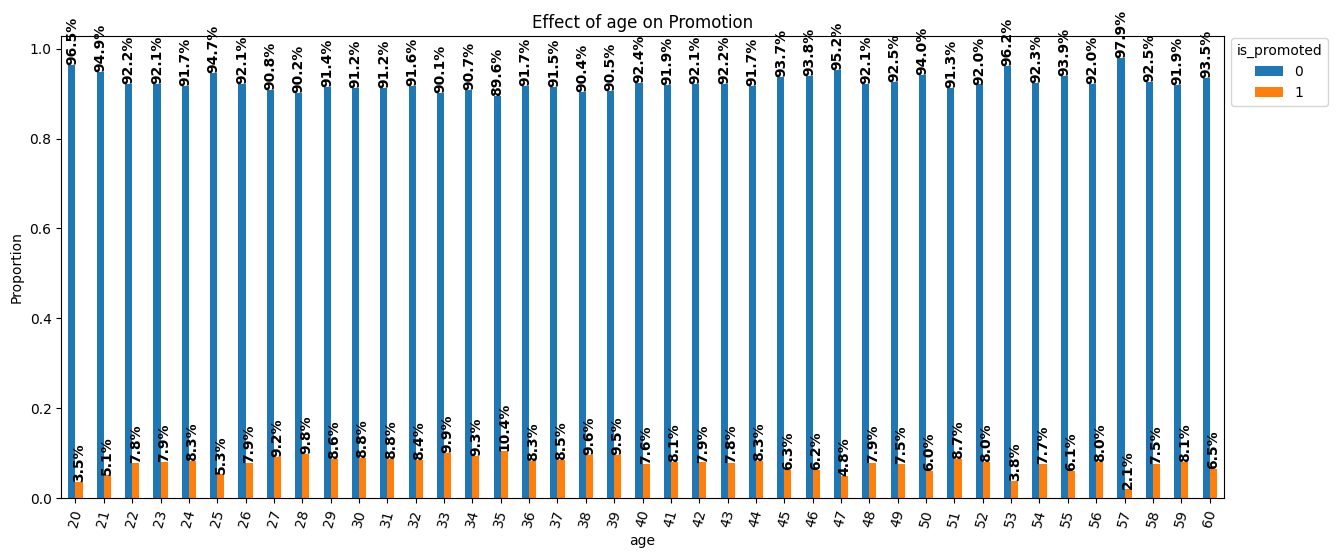

In [ ]:
explore_effect_on_promotion('age',90)

Since age is a continuous variable, let's look at this distribution/effect with binning.

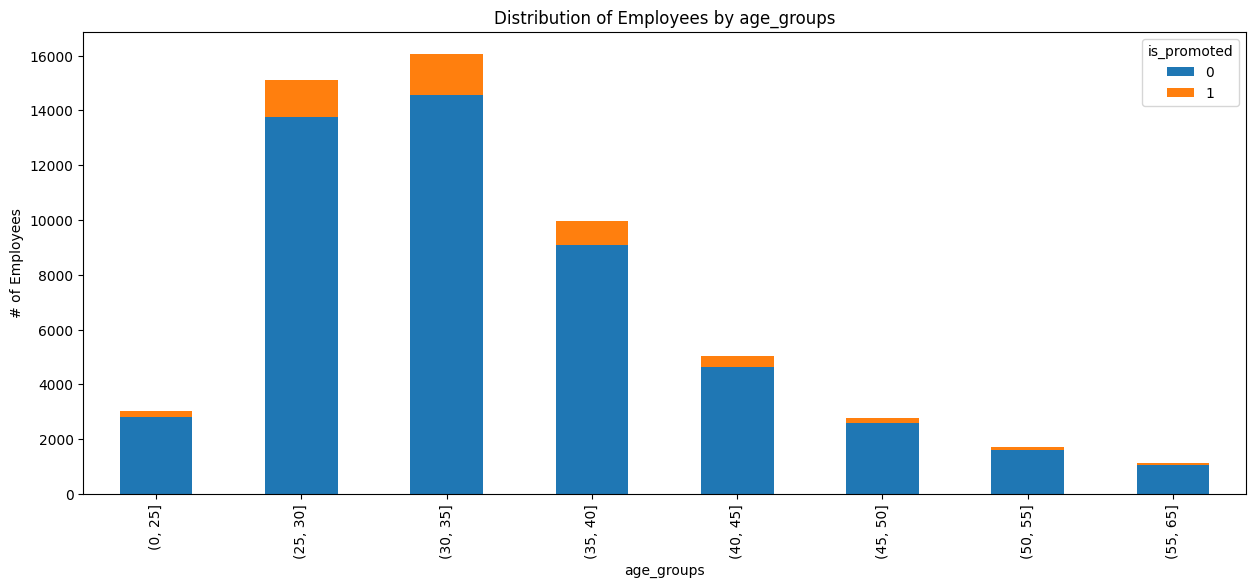

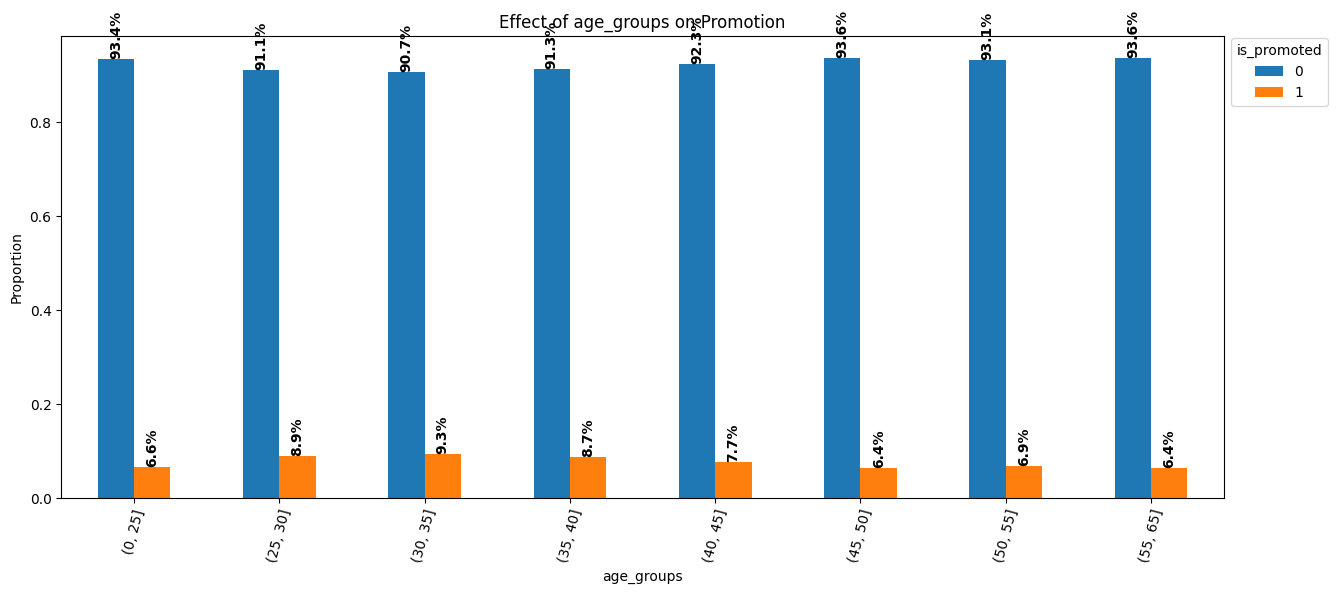

In [ ]:
df_fna['age_groups'] = pd.cut(df_fna['age'], [0,25,30,35,40,45,50,55,65])
explore_effect_on_promotion('age_groups',90)

##Explore Previous Year Rating Effect on Promotion

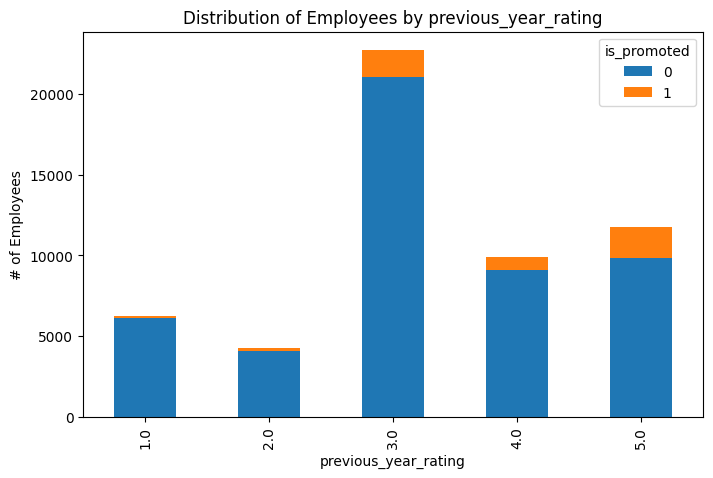

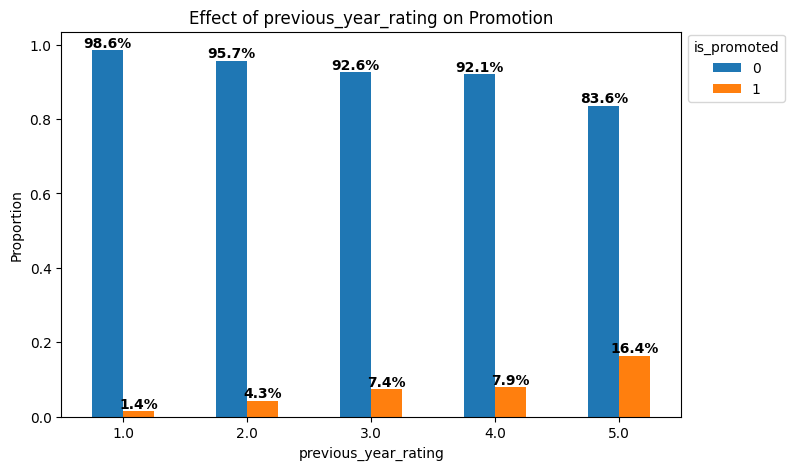

In [ ]:
explore_effect_on_promotion('previous_year_rating',0)

##Explore Length of Service Effect on Promotion

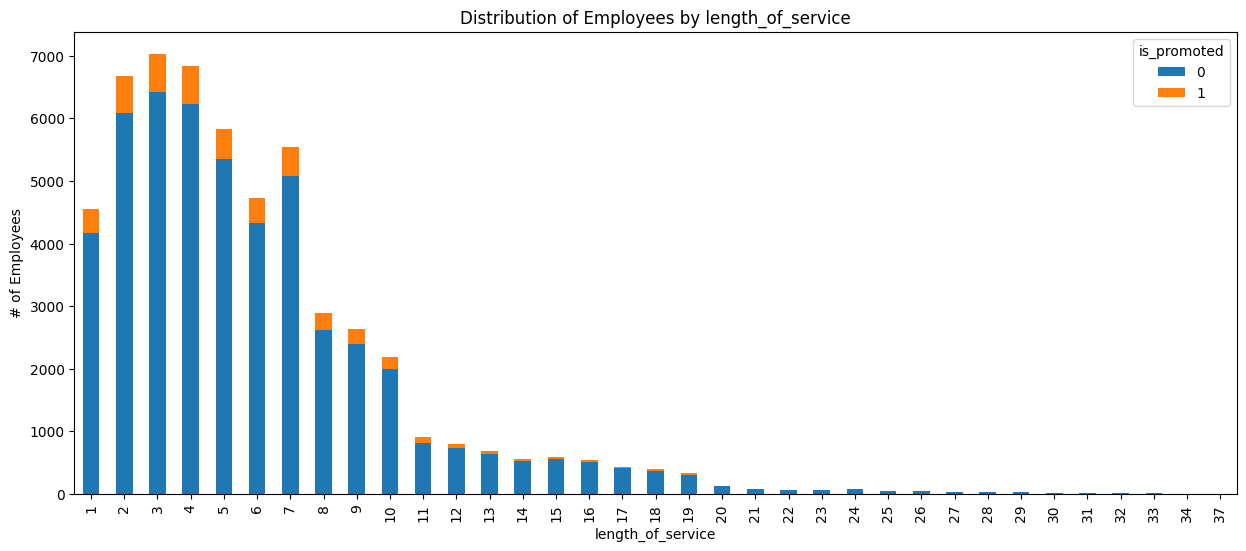

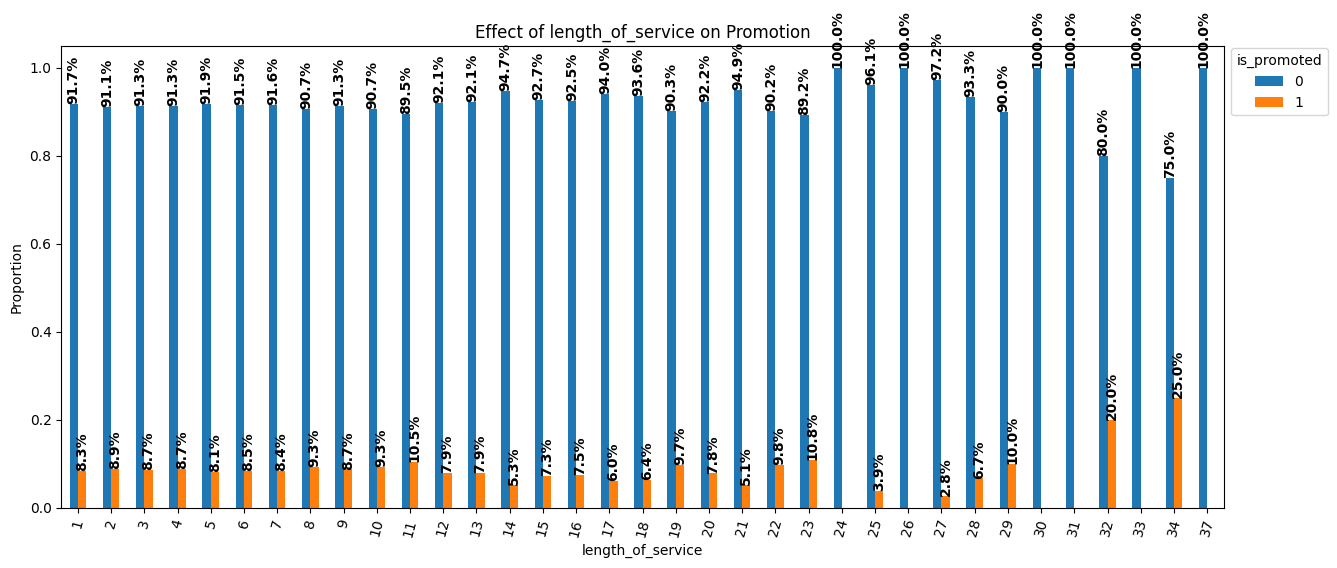

In [ ]:
explore_effect_on_promotion('length_of_service',90)

Length of Service is continuous variable, let's bin this one as well.

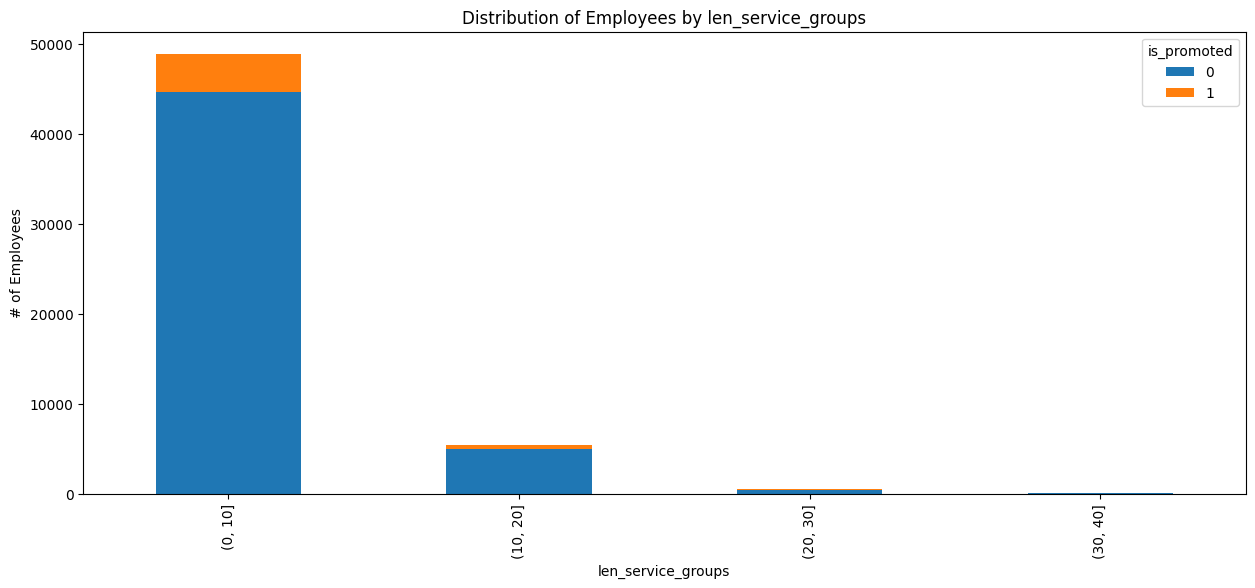

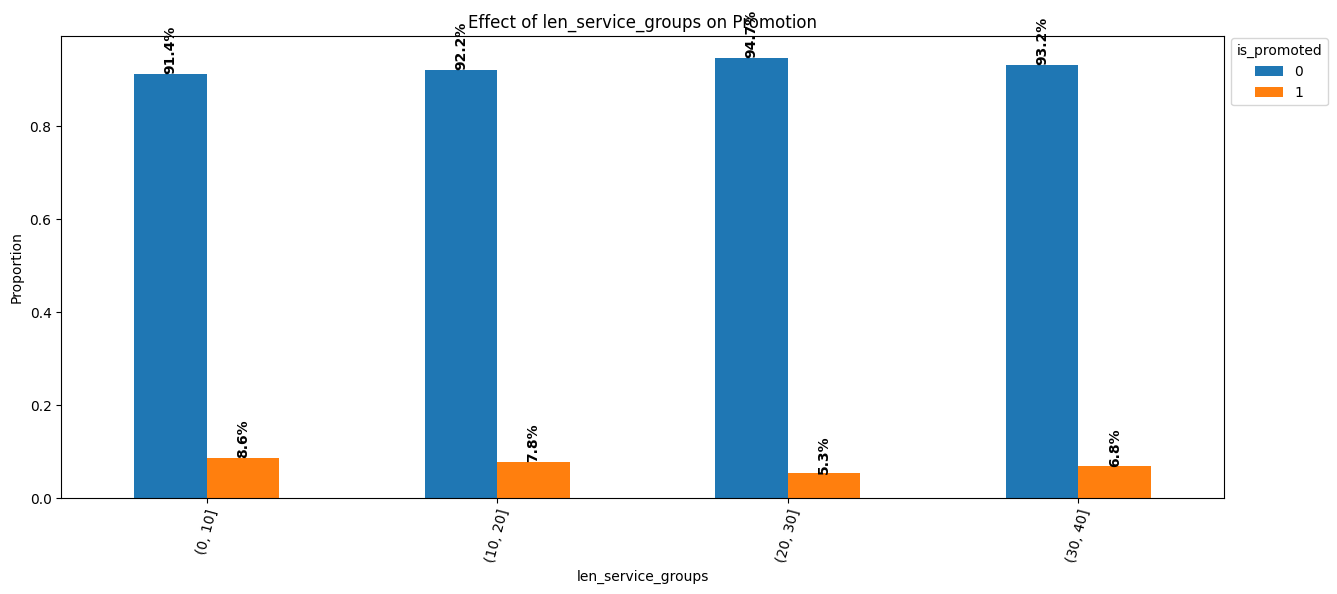

In [ ]:
df_fna['len_service_groups'] = pd.cut(df_fna['length_of_service'], [0,10,20,30,40])
explore_effect_on_promotion('len_service_groups',90)

##Explore KPI's Met >80% Effect on Promotion

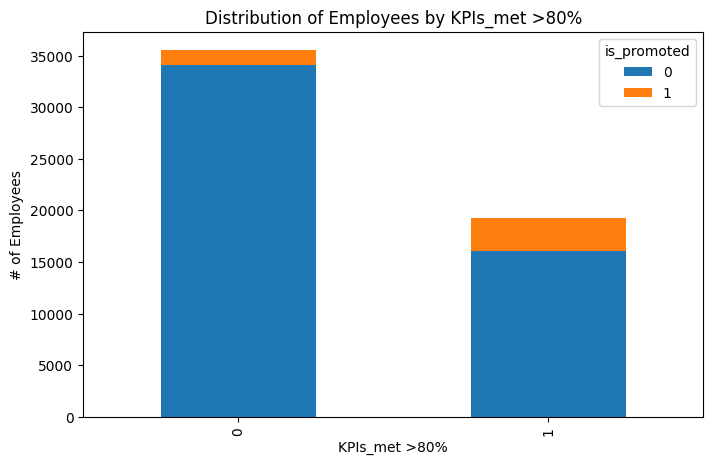

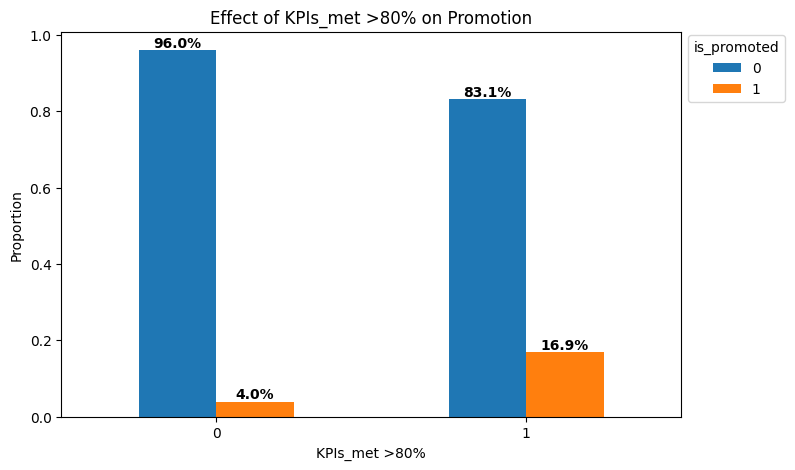

In [ ]:
explore_effect_on_promotion('KPIs_met >80%',0)

##Explore Awards Won? Effect on Promotion

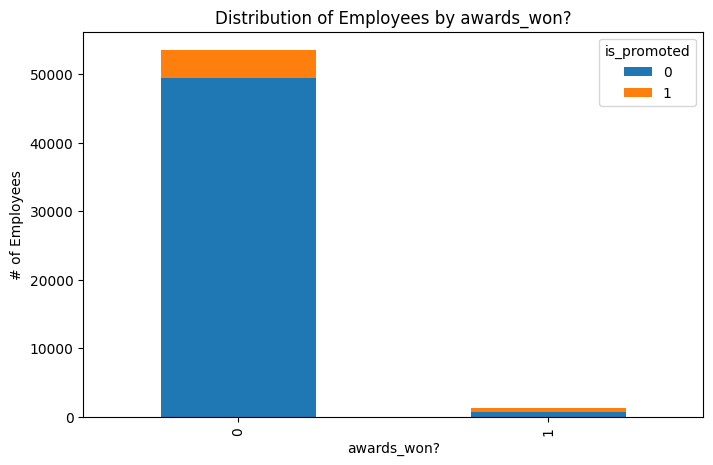

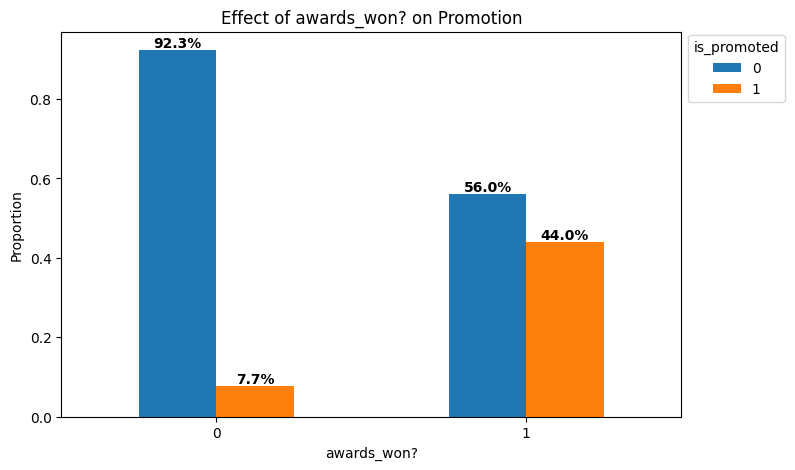

In [ ]:
explore_effect_on_promotion('awards_won?',0)

##Explore Avg Training Score Effect on Promotion

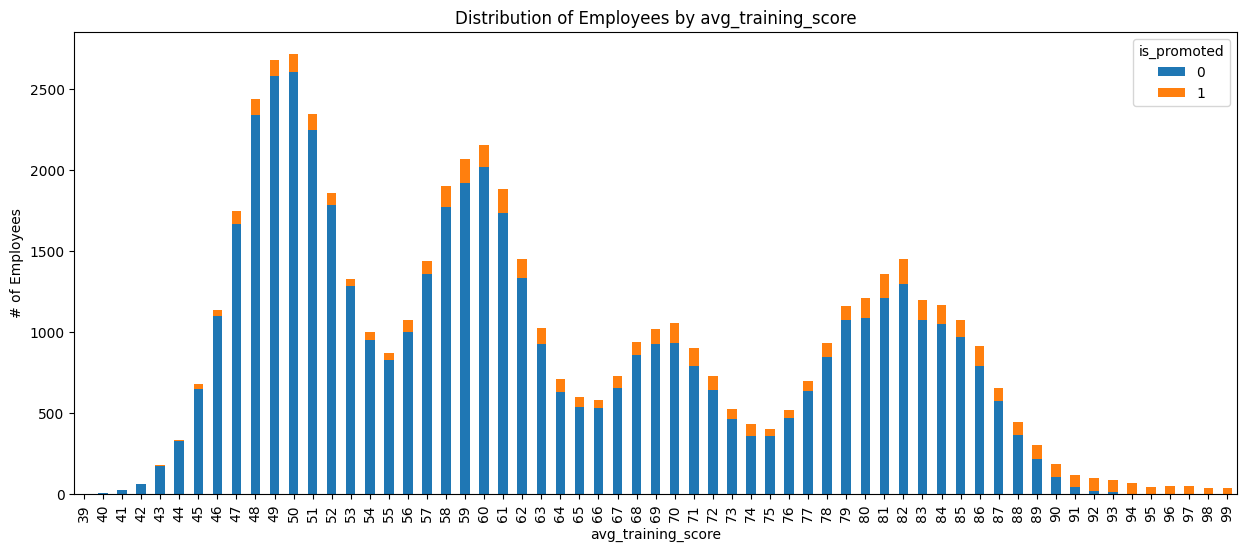

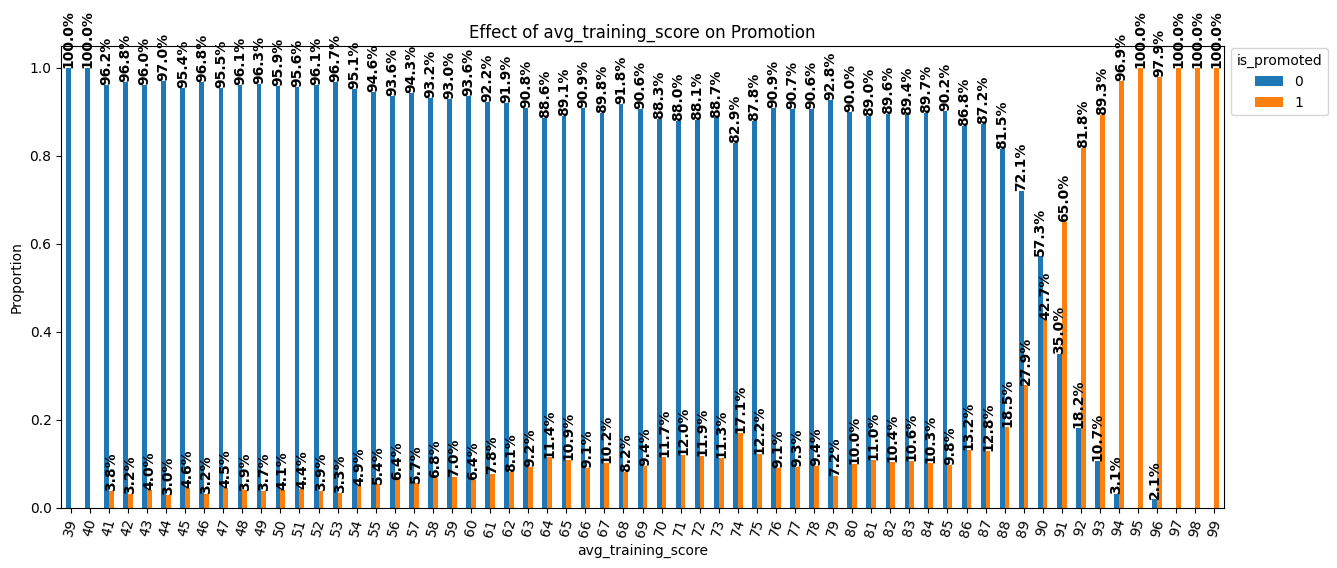

In [ ]:
explore_effect_on_promotion('avg_training_score',90)

Training score is also continuous. Let's bin this one too.

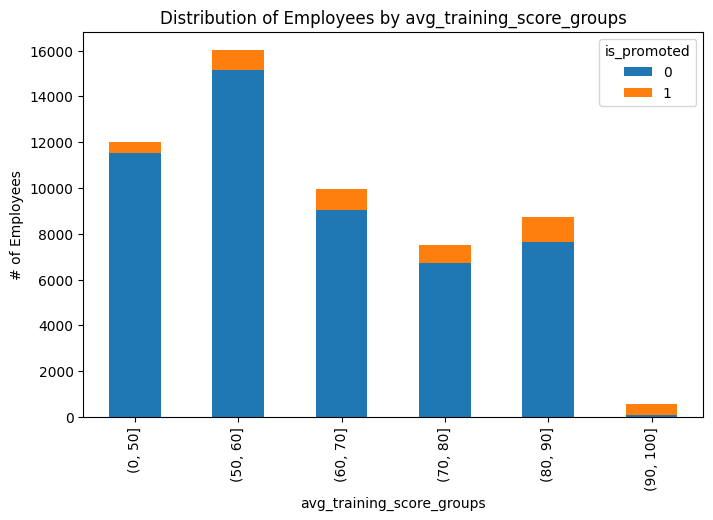

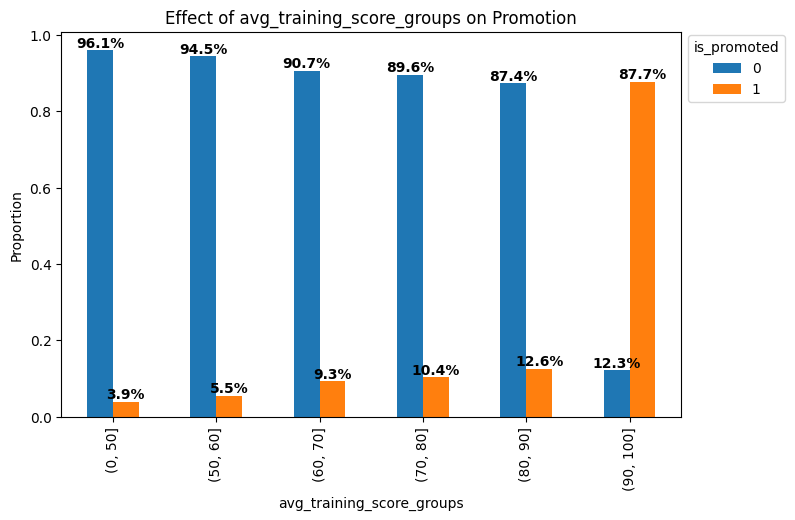

In [ ]:
df_fna['avg_training_score_groups'] = pd.cut(df_fna['avg_training_score'], [0,50,60,70,80,90,100])
explore_effect_on_promotion('avg_training_score_groups',90)

Looking at each feature individually, it looks like features have the most effect on promotion in the following order avg_training_score, awards_won, Previous_year_rating, KPIs Met >80, Region, no_of_trainings, Department, recruitment_channel, length_of_service, age, education, gender. With the top three having the largest effect.

##Shincy

In [ ]:
inputs = df_fna.drop('is_promoted',axis=1) #inputs


In [ ]:
dummies=pd.get_dummies(inputs.gender)
dummies.head()

,f,m
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
inputs=pd.concat([inputs,dummies],axis=1)
inputs.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_groups,len_service_groups,avg_training_score_groups,f,m
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,"(30, 35]","(0, 10]","(0, 50]",1,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,"(25, 30]","(0, 10]","(50, 60]",0,1
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,"(30, 35]","(0, 10]","(0, 50]",0,1
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,"(35, 40]","(0, 10]","(0, 50]",0,1
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,"(40, 45]","(0, 10]","(70, 80]",0,1


In [ ]:

inputs = inputs.drop(['gender'],axis=1)
inputs.head()

,Unnamed: 0,employee_id,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_groups,len_service_groups,avg_training_score_groups,f,m
0,0,65438,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,49,"(30, 35]","(0, 10]","(0, 50]",1,0
1,1,65141,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,0,60,"(25, 30]","(0, 10]","(50, 60]",0,1
2,2,7513,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,50,"(30, 35]","(0, 10]","(0, 50]",0,1
3,3,2542,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,0,50,"(35, 40]","(0, 10]","(0, 50]",0,1
4,4,48945,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,0,73,"(40, 45]","(0, 10]","(70, 80]",0,1
